/var/folders/z2/x7j4rzyx2c7bdjp40rd5l0hm0000gn/T/ipykernel_75798/3280653959.py:23: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


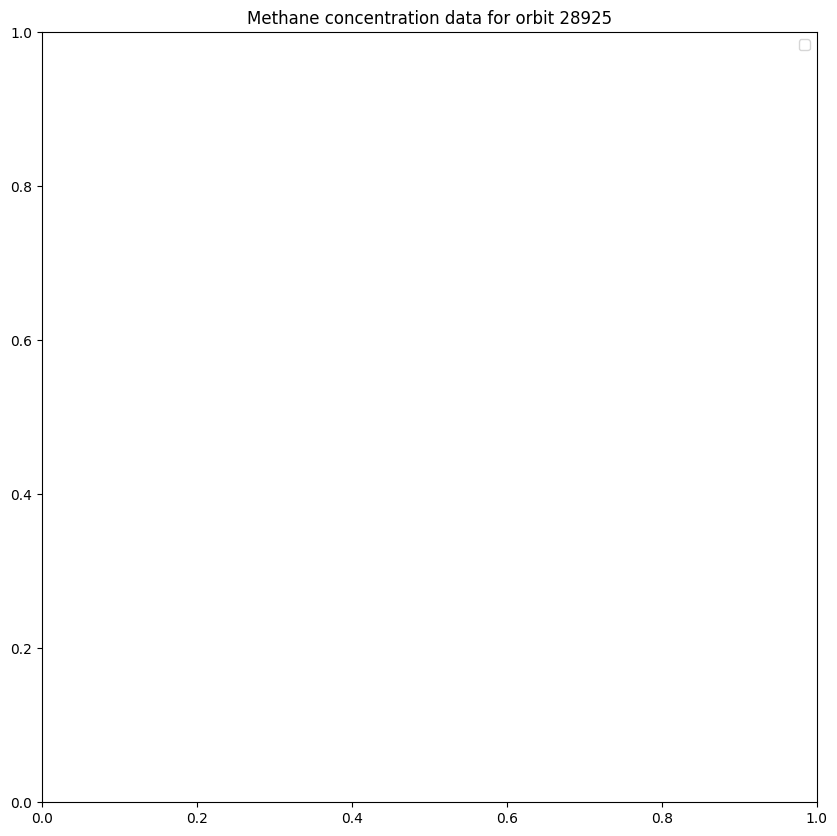

In [48]:
# #creat au map
# import geopandas as gpd
# import matplotlib.pyplot as plt

# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# australia = world[world['name'] == 'Australia']

# fig, ax = plt.subplots(figsize=(10, 10))
# australia.plot(ax=ax, color='lightgray', edgecolor='black')

# ax.set_title('Map of Australia')
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')

# plt.show()


from sentinelsat import SentinelAPI
from datetime import date
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
australia = world[world['name'] == 'Australia']


api = SentinelAPI("s5pguest", "s5pguest", "https://s5phub.copernicus.eu/dhus", show_progressbars=True, timeout=60)

# Search product ID using OpenSearch
data_date = (date(2023, 4, 24), date(2023, 4, 25))
product_type = "L2__CH4___"
kw = {
    "orbitnumber": 28627
}

# Query data
result = api.query(date=data_date, producttype=product_type, **kw)
product_ids = list(result.keys())

result_df = api.to_dataframe(result)
result_geojson = api.to_geojson(result)
result_gdf = api.to_geodataframe(result)



# Plot the data on a map of Australia
fig, ax = plt.subplots(figsize=(10, 10))
australia.boundary.plot(ax=ax, linewidth=1, color='black')
result_gdf.plot(ax=ax, color='red', markersize=10)
plt.title("Methane concentration data for orbit 28925")
plt.legend(["Australia", "Methane Concentration"])
plt.show()


/var/folders/z2/x7j4rzyx2c7bdjp40rd5l0hm0000gn/T/ipykernel_75798/714210922.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


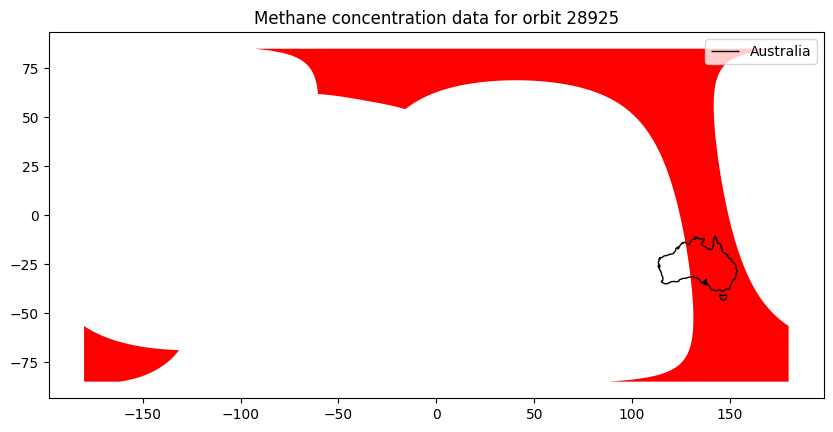

In [51]:
from sentinelsat import SentinelAPI
from datetime import date
import geopandas as gpd
import matplotlib.pyplot as plt

# Download the shapefile of Australia or use a GeoJSON file
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
australia = world[world['name'] == 'Australia']

api = SentinelAPI("s5pguest", "s5pguest", "https://s5phub.copernicus.eu/dhus", show_progressbars=True, timeout=60)

# Search product ID using OpenSearch
data_date = (date(2020, 5, 7), date(2023, 5, 20))
product_type = "L2__CH4___"
kw = {
    "orbitnumber": 28627
}

# Query data
result = api.query(date=data_date, producttype=product_type, **kw)
product_ids = list(result.keys())

result_df = api.to_dataframe(result)
result_geojson = api.to_geojson(result)
result_gdf = api.to_geodataframe(result)

# Load the shapefile of Australia


# Plot the data on a map of Australia
fig, ax = plt.subplots(figsize=(10, 10))
australia.boundary.plot(ax=ax, linewidth=1, color='black')
result_gdf.plot(ax=ax, color='red', markersize=10)


plt.title("Methane concentration data for orbit 28925")
plt.legend(["Australia", "Methane Concentration"])
plt.show()

